In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from ietf_wg_mb_extractor import IETF_WG_MB_Extractor
from argparse import ArgumentParser


%load_ext autoreload
%autoreload 2
from explore_data import DataExplorer
from prepare_data import DataPreparator

In [2]:
def set_parameters(grid_color, axes_edgecolor, axes_facecolor, figsize):
    sns.set(rc={"grid.color": grid_color, 
                "axes.edgecolor": axes_edgecolor, 
                "axes.facecolor": axes_facecolor,
                'figure.figsize': figsize})

In [3]:
set_parameters(grid_color="#99e2b4", axes_edgecolor="#99e2b4", axes_facecolor="#e6ffed", figsize=(9, 5))

In [4]:
archive_path = 'email-archives/'

In [5]:
extractor = IETF_WG_MB_Extractor(archive_path)
extractor.combine_wg_files(ratio=None)
active_wg_dataframe = extractor.get_combined_wg_dataframes()

Successfully scraped active WG names
------------------------------------
Successfully extracted names of active WGs existing in files
------------------------------------------------------------
Successfully converted and concatenated all .csv files into one dataframe
-------------------------------------------------------------------------


In [6]:
extractor = IETF_WG_MB_Extractor(archive_path)
data_preparator = DataPreparator(extractor)
clean_wg_dataframe = data_preparator.emails_df_cleaning(active_wg_dataframe)
processed_bodies = data_preparator.preprocess_bodies()
text_coll_combined = data_preparator.wg_combined_bodies_to_dict(processed_bodies)
text_coll_default = data_preparator.wg_bodies_to_dict(processed_bodies)

data_explorer = DataExplorer(colors = ['#eee82c', '#91cb3e', '#17A72D', '#4c934c','#368245'])

Initial dataframe shape: (532860, 8)
-----------------------------------------
Dataframe shape after cleaning rows: (46956, 9)

------PROCESSING------



100%|██████████| 46956/46956 [01:04<00:00, 723.71it/s] 


Prepocessing time: 64.88 s.

Number of mails removed: 13108
---------------------------------------
Encrypted messages: 3392
Ill from-formated messages: 208
Announc. messages: 4813
Unknown endcoding messages: 62
Empty messages post-processing: 4083
Diff. language: 463
Diverse other noise: 87


In [38]:
len(processed_bodies)

33848

In [44]:
test_wg = 'netmod'

In [ ]:
data_explorer.wg_wordcloud(text_coll_combined ,test_wg, max_words=50)

In [ ]:
data_explorer.messages_per_wg(text_coll_default)

In [10]:
# FIGURE OUT HOW TO SORT PLOTS IN DESCENDING ORDER FOR BETTER VISUALIZATION

In [ ]:
data_explorer.wg_body_len_dist(text_coll_default, test_wg, bins=110)

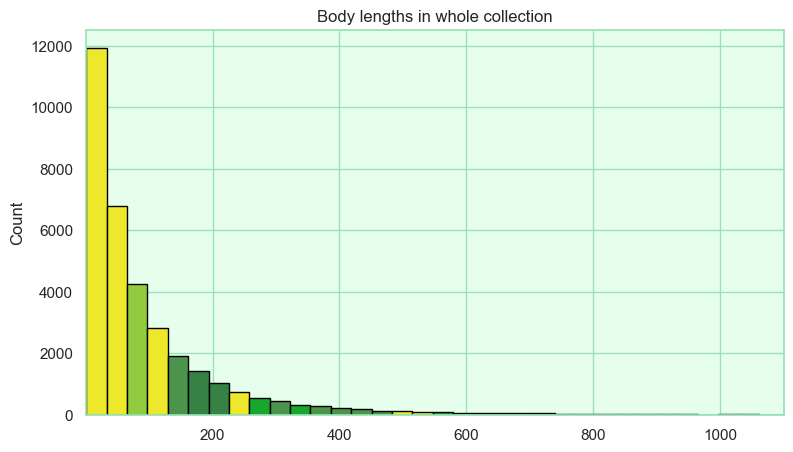

In [8]:
data_explorer.wg_body_len_dist(text_coll_default, bins=700, whole=True, limit=1100)

In [ ]:
data_explorer.ngram_vectorizer(text_coll_combined, 
                               vectorizer_type='count', 
                               wgs=list(text_coll_combined.keys()), 
                               ngram_range=(1,1), 
                               min_df=1)

In [ ]:
# This terms could potentially be used for key-word based search, which can be potentially described (future work or something like that)
data_explorer.ngram_vectorizer(text_coll_combined, 
                               vectorizer_type='tf_idf', 
                               wgs=list(text_coll_combined.keys())[:5], 
                               ngram_range=(2,2), 
                               min_df=1)

In [ ]:
# Pos-negative scales: 4 down to -4
data_explorer.sent_lex_vectorizer(text_coll_combined, wgs=list(text_coll_combined.keys()), pos_thres=3, neg_thresh=-3)

In [ ]:
data_explorer.keyword_concordance(text_coll_default, 
                                  list(text_coll_default.keys()),
                                  keywords=['bad'],
                                  left_context=10,
                                  right_context=10,
                                  max_num_samples=20)

In [39]:
train_bodies = data_preparator.prepare_data_for_model(text_coll_default, seed=77, percent_of_data=0.99)

Requested num. of samples: 31382
Actual num. of samples (due to post duplicate-removal): 30819


In [40]:
# Noise that could not have been removed 
train_bodies = [body for body in train_bodies if 'count bytes who' not in body]

In [ ]:
train_bodies

In [ ]:
for i, body in enumerate(train_bodies):
    print(i)
    print(body)
    print("-----------------------------", end='\n\n')